

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import itertools

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#fuente de pdatos
data_path = 'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_30032021.csv'
data_path_row = 'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_{}.csv'

img_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/img/'
autor='@walyt'
escovid='@escovid19data'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [10]:
hoy_string = datetime(year=2021, month=7, day= 23).strftime(format='%d%m%Y')
#hoy_string = datetime.today().strftime(format='%d %b')
#hoy_string = datetime.today().strftime(format='%d%m%Y')

In [11]:
hoy_string

'23072021'

In [12]:
data_path = data_path_row.format(hoy_string)

In [13]:
data_path

'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_23072021.csv'

Leemos los datos en un `pandas`

In [14]:
#df = pd.read_csv(data_path,encoding = "ISO-8859-1",sep=';',parse_dates=['Fecha'])
df = pd.read_csv(data_path,encoding = "ISO-8859-1",sep=';')

veamos una rápida descripción de la información:

In [15]:
df.tail()

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,INGRESOS_COVID19,ALTAS_24h_COVID19
55516,22/07/2021,U. Críticas SIN respirador,16,PAÍS VASCO,20,Gipuzkoa,0,0,0,0,0
55517,22/07/2021,U. Críticas SIN respirador,16,PAÍS VASCO,48,Bizkaia,10,0,5,0,0
55518,22/07/2021,U. Críticas SIN respirador,17,LA RIOJA,26,"Rioja, La",4,0,0,0,0
55519,22/07/2021,U. Críticas SIN respirador,18,CEUTA,51,Ceuta,0,0,0,0,0
55520,22/07/2021,U. Críticas SIN respirador,19,MELILLA,52,Melilla,2,0,0,0,0


In [16]:
df['Fecha'].unique()

array(['01/08/2020', '02/08/2020', '03/08/2020', '04/08/2020',
       '05/08/2020', '06/08/2020', '07/08/2020', '08/08/2020',
       '09/08/2020', '10/08/2020', '11/08/2020', '12/08/2020',
       '13/08/2020', '14/08/2020', '15/08/2020', '16/08/2020',
       '17/08/2020', '18/08/2020', '19/08/2020', '20/08/2020',
       '21/08/2020', '22/08/2020', '23/08/2020', '24/08/2020',
       '25/08/2020', '26/08/2020', '27/08/2020', '28/08/2020',
       '29/08/2020', '30/08/2020', '31/08/2020', '01/09/2020',
       '02/09/2020', '03/09/2020', '04/09/2020', '05/09/2020',
       '06/09/2020', '07/09/2020', '08/09/2020', '09/09/2020',
       '10/09/2020', '11/09/2020', '12/09/2020', '13/09/2020',
       '14/09/2020', '15/09/2020', '16/09/2020', '17/09/2020',
       '18/09/2020', '19/09/2020', '20/09/2020', '21/09/2020',
       '22/09/2020', '23/09/2020', '24/09/2020', '25/09/2020',
       '26/09/2020', '27/09/2020', '28/09/2020', '29/09/2020',
       '30/09/2020', '01/10/2020', '02/10/2020', '03/10

veamos las  columnas de interés:

In [17]:
df.columns

Index(['Fecha', 'Unidad', 'COD_CCAA', 'CCAA', 'Cod_Provincia', 'Provincia',
       'TOTAL_CAMAS', 'OCUPADAS_COVID19', 'OCUPADAS_NO_COVID19',
       'INGRESOS_COVID19', 'ALTAS_24h_COVID19'],
      dtype='object')

In [18]:
df.Unidad.unique()

array(['Hospitalización convencional', 'U. Críticas CON respirador',
       'U. Críticas SIN respirador'], dtype=object)

In [19]:
df.CCAA.unique()

array(['ANDALUCÍA', 'ARAGÓN', 'ASTURIAS', 'ISLAS BALEARES',
       'ISLAS CANARIAS', 'CANTABRIA', 'CASTILLA Y LEÓN',
       'CASTILLA LA MANCHA', 'CATALUÑA', 'COMUNIDAD VALENCIANA',
       'EXTREMADURA', 'GALICIA', 'MADRID', 'MURCIA', 'NAVARRA',
       'PAÍS VASCO', 'LA RIOJA', 'CEUTA', 'MELILLA'], dtype=object)

Parece que es ok, no hay nombres duplicados (muy usual que cambie algún acento por ejemplo)

Convertimos la columna `fecha` en datetime

In [20]:
df['Fecha'] = pd.to_datetime(df['Fecha'],format='%d/%m/%Y')

In [21]:
df['Fecha'] = pd.to_datetime(df['Fecha'],format='%Y-%m-%d')

y vamos añadir dos columnas adicionales `hola` : 
- `porcentaje_total`:  `OCUPADAS_COVID19`+`OCUPADAS_NO_COVID19` / `TOTAL_CAMAS` 
- `porcentaje_covid`: `OCUPADAS_COVID19`/ `TOTAL_CAMAS`

In [22]:
(df['Provincia']=='Madrid').any()

True

In [23]:
provincias = sorted(list(df['Provincia'].unique()))
provincias.insert(0,provincias.pop(-1))

In [24]:
fechas = df['Fecha'].unique()
unidades = df['Unidad'].unique()
for i in itertools.product(fechas,provincias,unidades):
    if ((df['Fecha']==i[0])&(df['Provincia']==i[1])&(df['Unidad']==i[2])).any():
        pass
    else:
        print (i)
        df=df.append({
            'Fecha':i[0],
            'Provincia':i[1],
            'Unidad':i[2],
            'TOTAL_CAMAS':np.NaN,
            'OCUPADAS_COVID19':np.NaN,
            'OCUPADAS_COVID19':np.NaN
        },
            ignore_index=True
        )

(numpy.datetime64('2020-12-08T00:00:00.000000000'), 'Palencia', 'Hospitalización convencional')
(numpy.datetime64('2020-12-08T00:00:00.000000000'), 'Palencia', 'U. Críticas CON respirador')
(numpy.datetime64('2020-12-08T00:00:00.000000000'), 'Palencia', 'U. Críticas SIN respirador')
(numpy.datetime64('2021-01-02T00:00:00.000000000'), 'Palencia', 'Hospitalización convencional')
(numpy.datetime64('2021-01-02T00:00:00.000000000'), 'Palencia', 'U. Críticas CON respirador')
(numpy.datetime64('2021-01-02T00:00:00.000000000'), 'Palencia', 'U. Críticas SIN respirador')
(numpy.datetime64('2021-01-03T00:00:00.000000000'), 'Ceuta', 'Hospitalización convencional')
(numpy.datetime64('2021-01-03T00:00:00.000000000'), 'Ceuta', 'U. Críticas CON respirador')
(numpy.datetime64('2021-01-03T00:00:00.000000000'), 'Ceuta', 'U. Críticas SIN respirador')
(numpy.datetime64('2021-04-03T00:00:00.000000000'), 'Palencia', 'Hospitalización convencional')
(numpy.datetime64('2021-04-03T00:00:00.000000000'), 'Palencia

In [25]:
df.tail()

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,INGRESOS_COVID19,ALTAS_24h_COVID19
55531,2021-04-03,U. Críticas CON respirador,NaN,NaN,NaN,Palencia,NaN,NaN,NaN,NaN,NaN
55532,2021-04-03,U. Críticas SIN respirador,NaN,NaN,NaN,Palencia,NaN,NaN,NaN,NaN,NaN
55533,2021-04-13,Hospitalización convencional,NaN,NaN,NaN,Palencia,NaN,NaN,NaN,NaN,NaN
55534,2021-04-13,U. Críticas CON respirador,NaN,NaN,NaN,Palencia,NaN,NaN,NaN,NaN,NaN
55535,2021-04-13,U. Críticas SIN respirador,NaN,NaN,NaN,Palencia,NaN,NaN,NaN,NaN,NaN


In [26]:
df[df['Provincia']=='Palencia'].sort_values('Fecha')

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,INGRESOS_COVID19,ALTAS_24h_COVID19
19,2020-08-01,Hospitalización convencional,7.0,CASTILLA Y LEÓN,34.0,Palencia,331.0,5.0,272.0,1.0,0.0
71,2020-08-01,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,16.0,0.0,11.0,0.0,0.0
123,2020-08-01,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.0,0.0
175,2020-08-02,Hospitalización convencional,7.0,CASTILLA Y LEÓN,34.0,Palencia,336.0,1.0,255.0,0.0,0.0
227,2020-08-02,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,16.0,0.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
55332,2021-07-21,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.0,0.0
55280,2021-07-21,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,20.0,8.0,10.0,0.0,0.0
55488,2021-07-22,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.0,0.0
55436,2021-07-22,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,20.0,9.0,10.0,2.0,1.0


In [27]:
df['porcentaje_total'] = 100*(df['OCUPADAS_COVID19']+df['OCUPADAS_NO_COVID19'])/df['TOTAL_CAMAS']
df['porcentaje_covid'] = 100*(df['OCUPADAS_COVID19'])/df['TOTAL_CAMAS']

In [28]:
df=df.fillna(0)

In [29]:
df = df.sort_values('Fecha')

In [41]:
df = df[df['Fecha']>='2021-04-01']

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [42]:
datos1 = pd.melt(df[df['Unidad']=='Hospitalización convencional'], id_vars=['Fecha','Provincia'],value_vars=['porcentaje_total','porcentaje_covid'])

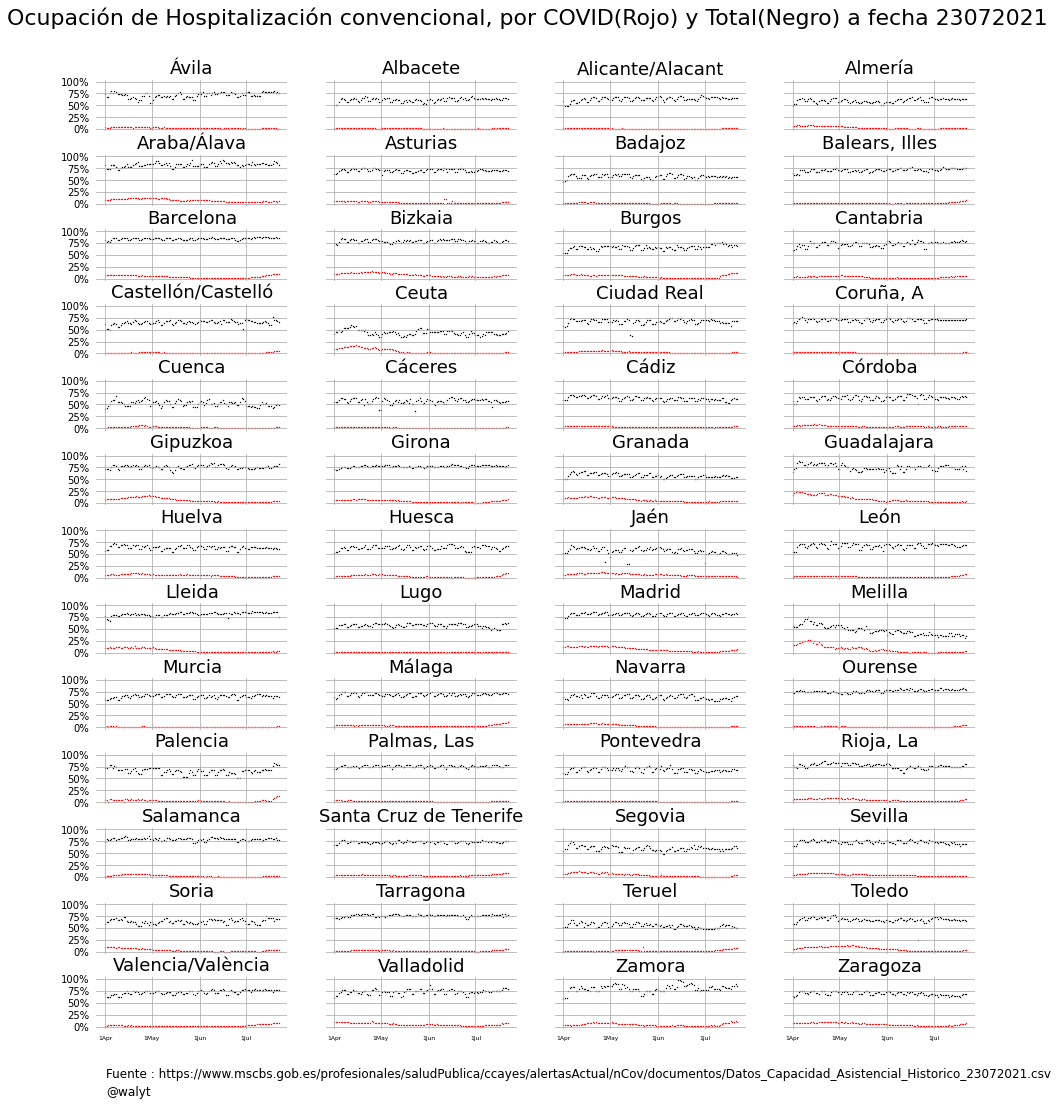

In [43]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(datos1,col='Provincia',hue='variable',col_wrap=4,aspect=2.5, 
                      margin_titles=False,height=1.3,sharey=True,col_order=provincias,palette=['Black','Red'])
g.map_dataframe(sns.scatterplot, x="Fecha", y="value",s=2)

# Título
unidad = 'Hospitalización convencional'
#unidad = 'U. Críticas CON respirador'
#unidad = 'U. Críticas SIN respirador'
titulo1 = 'Ocupación de {}, por COVID(Rojo) y Total(Negro) a fecha {}'.format(unidad,hoy_string)
titulo2 = 'Fuente : {}'.format(data_path)

color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

g.set_titles(row_template="{row_name}", col_template="{col_name}",size=18)
XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
for ax in g.axes.flat:
    
    ax.yaxis.set_major_formatter(yticks)
    ax.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes)
    #a1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_tick_params(labelsize=6,width=0,labelcolor=color_ejes,rotation=0)
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.set_yticks([0,25,50,75,100])
    ax.xaxis.set_major_locator(DayLocator([1]))
    ax.grid(True,axis='both',which='both')
   


#plt.legend()
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
#g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
#g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)
g.fig.text(x=0.05,y=.1,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.085,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.92,bottom=.14,wspace=0.2,hspace=0.45)
#plt.tight_layout()
plt.savefig(img_path+unidad+'_provincias.png',dpi=288)  

plt.show()


# Graficos de UCI acumulados con respirador y sin respirador

In [53]:
datos2 = df.copy()

In [54]:
datos2

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,INGRESOS_COVID19,ALTAS_24h_COVID19,porcentaje_total,porcentaje_covid
38002,2021-04-01,U. Críticas CON respirador,19.0,MELILLA,52.0,Melilla,15.0,2.0,1.0,0.0,1.0,20.000000,13.333333
38003,2021-04-01,U. Críticas SIN respirador,1.0,ANDALUCÍA,4.0,Almería,55.0,0.0,10.0,0.0,0.0,18.181818,0.000000
38004,2021-04-01,U. Críticas SIN respirador,1.0,ANDALUCÍA,11.0,Cádiz,34.0,0.0,3.0,0.0,0.0,8.823529,0.000000
38005,2021-04-01,U. Críticas SIN respirador,1.0,ANDALUCÍA,14.0,Córdoba,59.0,1.0,4.0,0.0,1.0,8.474576,1.694915
38006,2021-04-01,U. Críticas SIN respirador,1.0,ANDALUCÍA,18.0,Granada,19.0,0.0,8.0,0.0,0.0,42.105263,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55424,2021-07-22,U. Críticas CON respirador,1.0,ANDALUCÍA,41.0,Sevilla,295.0,32.0,103.0,1.0,2.0,45.762712,10.847458
55425,2021-07-22,U. Críticas CON respirador,2.0,ARAGÓN,22.0,Huesca,19.0,6.0,7.0,1.0,0.0,68.421053,31.578947
55426,2021-07-22,U. Críticas CON respirador,2.0,ARAGÓN,44.0,Teruel,6.0,1.0,3.0,0.0,0.0,66.666667,16.666667
55418,2021-07-22,U. Críticas CON respirador,1.0,ANDALUCÍA,11.0,Cádiz,210.0,12.0,65.0,1.0,0.0,36.666667,5.714286


In [55]:
datos2['Fecha']

38002   2021-04-01
38003   2021-04-01
38004   2021-04-01
38005   2021-04-01
38006   2021-04-01
           ...    
55424   2021-07-22
55425   2021-07-22
55426   2021-07-22
55418   2021-07-22
55415   2021-07-22
Name: Fecha, Length: 17628, dtype: datetime64[ns]

In [56]:
for i in itertools.product(fechas,provincias):
    
    
    camas_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['TOTAL_CAMAS'].values[0]
    camas_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['TOTAL_CAMAS'].values[0]
    ocupadas_covid_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['OCUPADAS_COVID19'].values[0]
    ocupadas_covid_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['OCUPADAS_COVID19'].values[0]
    ocupadas_no_covid_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['OCUPADAS_NO_COVID19'].values[0]
    ocupadas_no_covid_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['OCUPADAS_NO_COVID19'].values[0]
    datos2=datos2.append({
        'Fecha':i[0],
        'Provincia':i[1],
        'TOTAL_CAMAS':camas_sin+camas_con,
        'OCUPADAS_NO_COVID19':ocupadas_no_covid_sin+ocupadas_no_covid_con,
        'OCUPADAS_COVID19':ocupadas_covid_sin+ocupadas_covid_con,
        'Unidad':'U. Crítica Total'
        
    },ignore_index=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
datos2['porcentaje_total'] = 100*(datos2['OCUPADAS_COVID19']+datos2['OCUPADAS_NO_COVID19'])/datos2['TOTAL_CAMAS']
datos2['porcentaje_covid'] = 100*datos2['OCUPADAS_COVID19']/datos2['TOTAL_CAMAS']
datos2=datos2.fillna(0)

In [49]:
datos3 = datos2[datos2['Unidad']=='U. Crítica Total']

In [50]:
datos3 = pd.melt(datos3, id_vars=['Fecha','Provincia'],value_vars=['porcentaje_total','porcentaje_covid'])

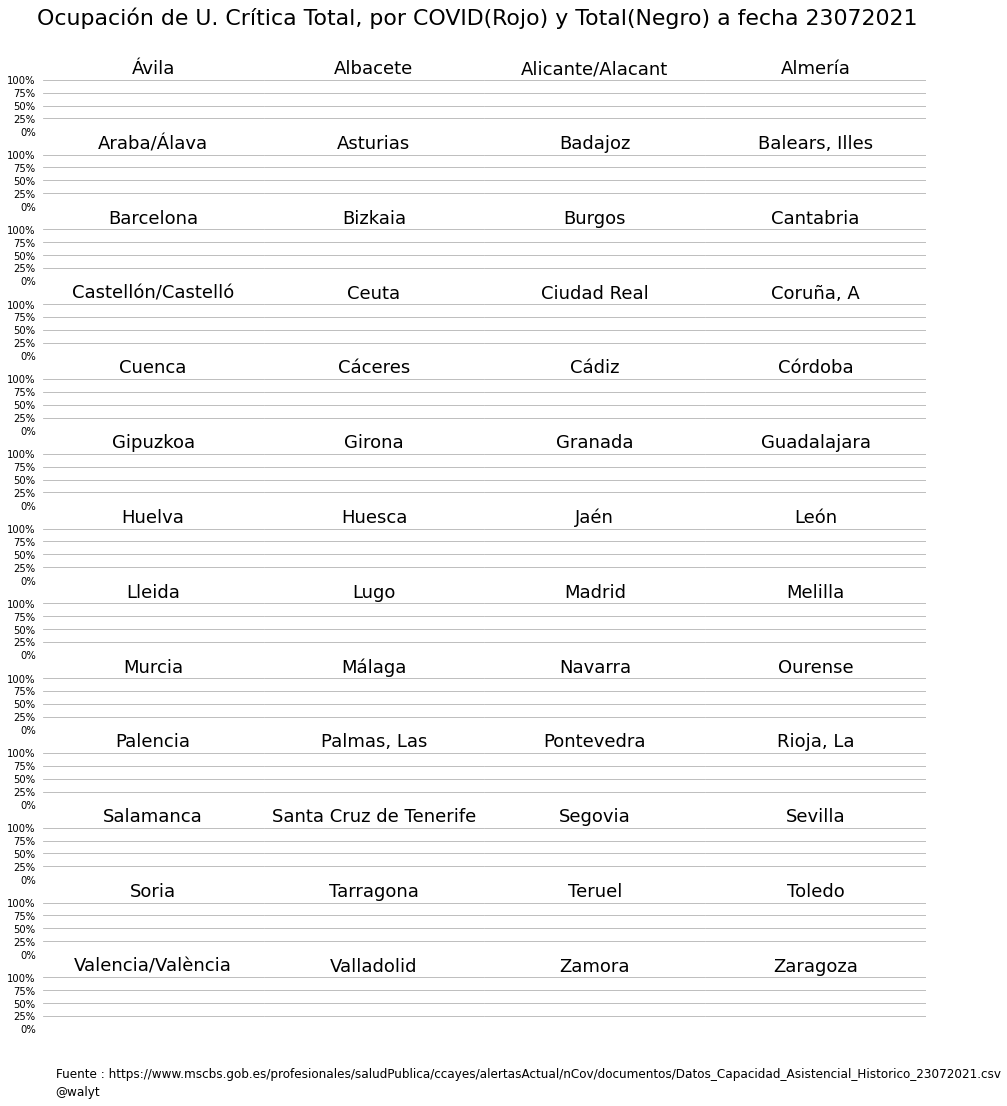

In [51]:
sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(datos3,col='Provincia',hue='variable',col_wrap=4,aspect=2.5, 
                      margin_titles=False,height=1.3,sharey=True,col_order=provincias,palette=['Black','Red'])
g.map_dataframe(sns.scatterplot, x="Fecha", y="value",s=2)
unidad = 'U. Crítica Total'
titulo1 = 'Ocupación de {}, por COVID(Rojo) y Total(Negro) a fecha {}'.format(unidad,hoy_string)
titulo2 = 'Fuente : {}'.format(data_path)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

g.set_titles(row_template="{row_name}", col_template="{col_name}",size=18)
XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
for ax in g.axes.flat:
    
    ax.yaxis.set_major_formatter(yticks)
    ax.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes)
    #a1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_tick_params(labelsize=6,width=0,labelcolor=color_ejes,rotation=0)
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.set_yticks([0,25,50,75,100])
    ax.xaxis.set_major_locator(DayLocator([1]))
    ax.grid(True,axis='both',which='both')
   


#plt.legend()
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
#g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
#g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)
g.fig.text(x=0.05,y=.1,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.085,s=autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.92,bottom=.14,wspace=0.0,hspace=0.45)
#plt.tight_layout()
plt.savefig(img_path+unidad+'_provincias.png',dpi=288)  

plt.show()
